# Problem sheet 8

> Muhammad Mustafa 25850354

> Zunaira Zunaira  10931968

>Zalfa Mohayyudin 12749927

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:

data = np.load('flows.npz')
t = data['t']  # shape: (nT,)
xA = data['xA']  # shape: (nT, nX, 2)
xB = data['xB']
xC = data['xC']

nT, nX, _ = xA.shape


# 1. Visualize Trajectories

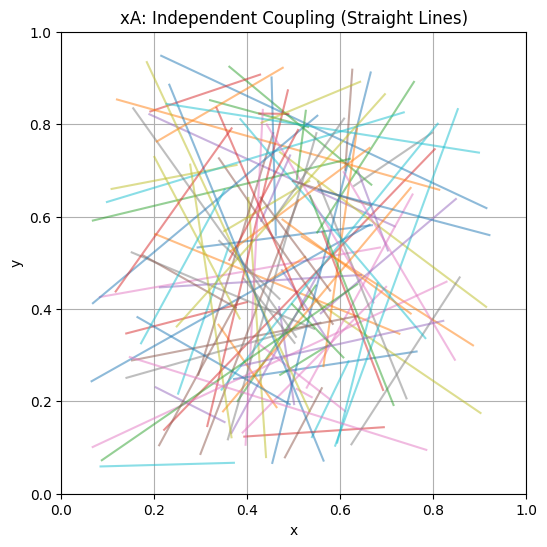

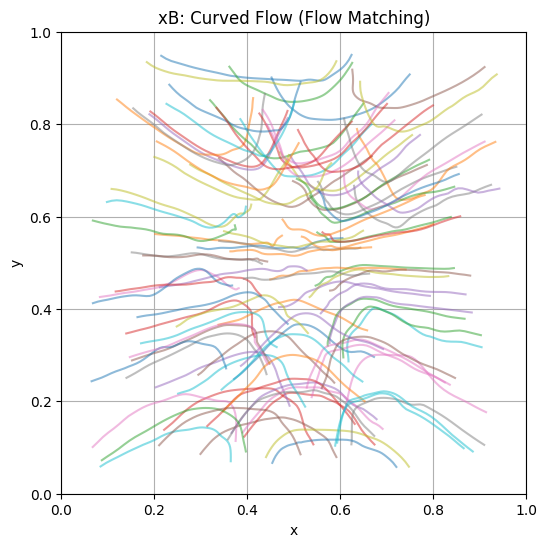

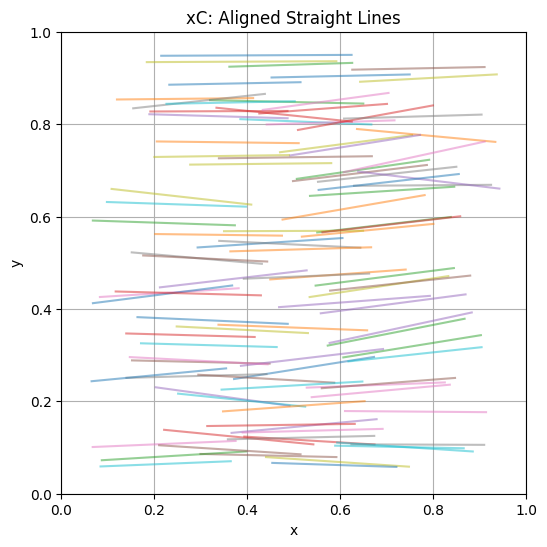

In [4]:
def plot_trajectories(x, title, n_particles=100):
    plt.figure(figsize=(6, 6))
    for i in range(n_particles):
        plt.plot(x[:, i, 0], x[:, i, 1], alpha=0.5)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

plot_trajectories(xA, "xA: Independent Coupling (Straight Lines)")
plot_trajectories(xB, "xB: Curved Flow (Flow Matching)")
plot_trajectories(xC, "xC: Aligned Straight Lines")


# 2. Dynamic Particle Movement Visualization

In [6]:

def animate_particles(x, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    scat = ax.scatter([], [], s=1)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(title)

    def update(frame):
        scat.set_offsets(x[frame])
        ax.set_title(f"{title} - t = {t[frame]:.2f}")
        return scat,

    ani = animation.FuncAnimation(fig, update, frames=nT, interval=50, blit=True)
    plt.close()
    return ani

aniA = animate_particles(xA, "xA: Straight Lines")
aniB = animate_particles(xB, "xB: Curved Flow")
aniC = animate_particles(xC, "xC: Aligned Straight Lines")

# To display in Jupyter:
from IPython.display import HTML
HTML(aniA.to_jshtml())


# 3. Dynamic Probability Distribution Visualization

In [7]:
def animate_density(x, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    bins = [np.linspace(0, 1, 50), np.linspace(0, 1, 50)]
    img = ax.imshow(np.zeros((49, 49)), extent=[0, 1, 0, 1],
                    origin='lower', cmap='viridis', vmin=0, vmax=100)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    def update(frame):
        h, _, _ = np.histogram2d(x[frame, :, 0], x[frame, :, 1], bins=bins)
        img.set_data(h.T)
        ax.set_title(f"{title} - t = {t[frame]:.2f}")
        return img,

    ani = animation.FuncAnimation(fig, update, frames=nT, interval=50, blit=True)
    plt.close()
    return ani

ani_density_A = animate_density(xA, "Density Evolution: xA")
ani_density_B = animate_density(xB, "Density Evolution: xB")
ani_density_C = animate_density(xC, "Density Evolution: xC")

HTML(ani_density_A.to_jshtml())
